In [1]:
# With pandas, one can efficiently analyze, manipulate, and process data 
import pandas as pd

In [2]:
# pd.read_csv() function in pandas is used to read data from a CSV file and create a DataFrame object.
data = pd.read_csv('data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45680 entries, 0 to 45679
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           45680 non-null  int64  
 1   SOURCE_KEY           45680 non-null  object 
 2   DC_POWER             45680 non-null  float64
 3   AC_POWER             45680 non-null  float64
 4   DAILY_YIELD          45680 non-null  float64
 5   TOTAL_YIELD          45680 non-null  float64
 6   DATE_TIME            45680 non-null  object 
 7   AMBIENT_TEMPERATURE  45680 non-null  float64
 8   MODULE_TEMPERATURE   45680 non-null  float64
 9   IRRADIATION          45680 non-null  float64
 10  DATE                 45680 non-null  object 
 11  TIME                 45680 non-null  object 
 12  DAY                  45680 non-null  int64  
 13  MONTH                45680 non-null  int64  
 14  WEEK                 45680 non-null  int64  
 15  HOURS                45680 non-null 

# Solar Power Prediction using different ML techniques

In [4]:
# create a copy of 'data' and assign it to a new DataFrame called df_ml
df_ml = data.copy()

X = data[['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = data['AC_POWER']

In [5]:
# correlation matrix of the DataFrame X using the .corr() method

corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,IRRADIATION
DAILY_YIELD,1.000000,0.007277,0.489709,0.071937
TOTAL_YIELD,0.007277,1.000000,-0.036532,-0.004981
AMBIENT_TEMPERATURE,0.489709,-0.036532,1.000000,0.702218
IRRADIATION,0.071937,-0.004981,0.702218,1.000000


In [6]:
# split dataset into training and testing subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  98.33 %


In [9]:
from sklearn.metrics import mean_squared_error

y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 2631.7601


In [10]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 51.3007


In [11]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 26.0401


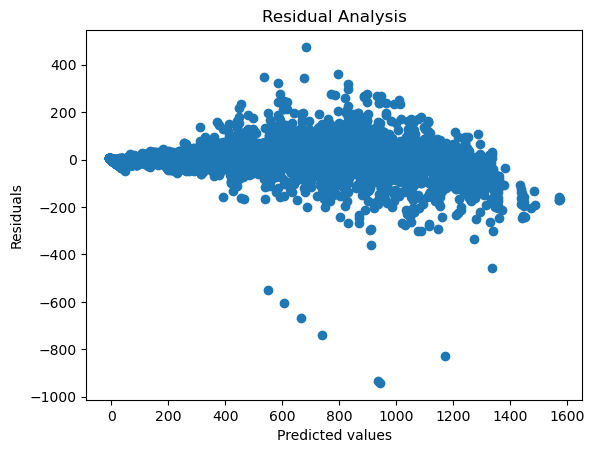

In [12]:
residuals = y_test - y_pred

# Plotting residuals
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

## KNN

In [13]:
from sklearn import neighbors

score_list = []
n_neighbors_list = []

# for loop to find best fitting n_neighbor value
for i in range(1, 21):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)

    knn_score = knn.score(X_test, y_test)

    score_list.append(knn_score)
    n_neighbors_list.append(i)

best_n_neighbor = n_neighbors_list[score_list.index(max(score_list))]
print(f"Best n_neighbor at {best_n_neighbor} with {max(score_list)*100:.4f} %")

Best n_neighbor at 2 with 88.3269 %


In [14]:
from sklearn.metrics import mean_squared_error

knn = neighbors.KNeighborsRegressor(n_neighbors=best_n_neighbor)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 18789.3651


In [15]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 137.0743


In [16]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 64.1076


In [17]:
r2 = knn.score(X_test, y_test)
print(f"R-squared: {r2:.4f}")

R-squared: 0.8833


In [18]:
from sklearn.metrics import explained_variance_score

explained_variance = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {explained_variance:.4f}")

Explained Variance Score: 0.8844


## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [20]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

dtr_score = dtr.score(X_test, y_test)
print(f"Score is {dtr_score*100:.4f} %")

Score is 98.3274 %


In [21]:
from sklearn.metrics import mean_squared_error

y_pred = dtr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 2692.3505


In [22]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Root Mean Squared Error (RMSE): 51.8879


In [23]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Absolute Error (MAE): 19.1499


In [24]:
r2 = dtr.score(X_test, y_test)
print(f"R-squared: {r2:.4f}")


R-squared: 0.9833


In [25]:
from sklearn.metrics import explained_variance_score

explained_variance = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {explained_variance:.4f}")


Explained Variance Score: 0.9833


# Random Forest 

In [26]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [27]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

rfr_score = rfr.score(X_test, y_test)
print(f"Score is {rfr_score*100:.4f} %")

Score is 99.0545 %


In [28]:
from sklearn.metrics import mean_squared_error

y_pred = rfr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 1521.9635


In [29]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Root Mean Squared Error (RMSE): 39.0124


In [30]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Absolute Error (MAE): 15.0234


In [31]:
r2 = rfr.score(X_test, y_test)
print(f"R-squared: {r2:.4f}")


R-squared: 0.9905


In [32]:
from sklearn.metrics import explained_variance_score

explained_variance = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {explained_variance:.4f}")


Explained Variance Score: 0.9905


#### MSE measures the average squared difference between the predicted and actual values. Lower values indicate better model performance.

#### RMSE is the square root of MSE and provides a measure of the average magnitude of the errors. Lower values indicate better model performance.

#### MAE measures the average absolute difference between the predicted and actual values. Lower values indicate better model performance.

#### R-squared measures the proportion of variance in the target variable explained by the model. Higher values indicate better model performance.

#### Explained variance score measures the proportion of variance in the target variable that can be explained by the model. Higher values indicate better model performance.


# Random Forest is the best model. 

# Prediction values of AC power

#### By printing forecast_prediction, an array or list of the predicted values for AC_POWER corresponding to the test set's input features (X_test) is produced. Each value in forecast_prediction represents the model's prediction for the AC_POWER value based on the given input features.

In [33]:
forecast_prediction = rfr.predict(X_test)
print(forecast_prediction)

[116.15455357   0.         873.84308929 ... 744.81475    103.73248214
   0.        ]


In [34]:
cross_check = pd.DataFrame({'Actual' : y_test , 'Predicted' : forecast_prediction})
cross_check.head()

,Actual,Predicted
29503,116.4750,116.154554
45488,0.0000,0.000000
40219,868.7125,873.843089
7270,485.1625,484.360304
15418,0.0000,0.000000


In [35]:
cross_check['Error'] = cross_check['Actual'] - cross_check['Predicted']
cross_check.head()

,Actual,Predicted,Error
29503,116.4750,116.154554,0.320446
45488,0.0000,0.000000,0.000000
40219,868.7125,873.843089,-5.130589
7270,485.1625,484.360304,0.802196
15418,0.0000,0.000000,0.000000


In [36]:
cross_check_final  = cross_check[cross_check['Error'] <= 20]
cross_check_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Times',
            'color': 'LigntGreen',
            'font-size': '13px'
        })

,Actual,Predicted,Error
274,0.000000,0.000000,0.000000
21273,0.000000,0.000000,0.000000
36318,964.914286,957.421661,7.492625
21668,0.000000,0.000000,0.000000
5876,0.000000,0.000000,0.000000
32654,2.512500,2.650571,-0.138071
11032,1074.942857,1057.762893,17.179964
7397,634.128571,667.007911,-32.879339
33275,0.000000,0.000000,0.000000
38089,607.325000,596.449554,10.875446


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

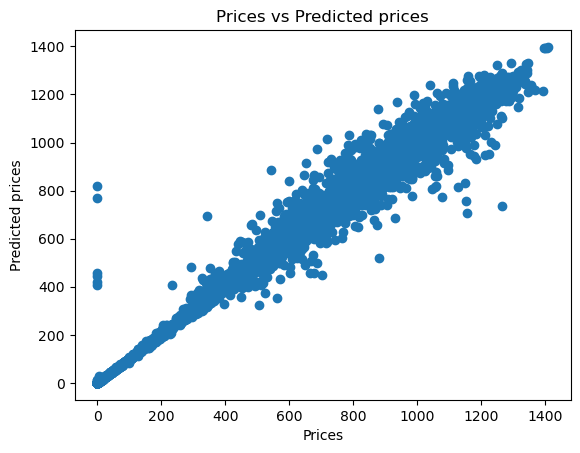

In [38]:

# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test,forecast_prediction)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

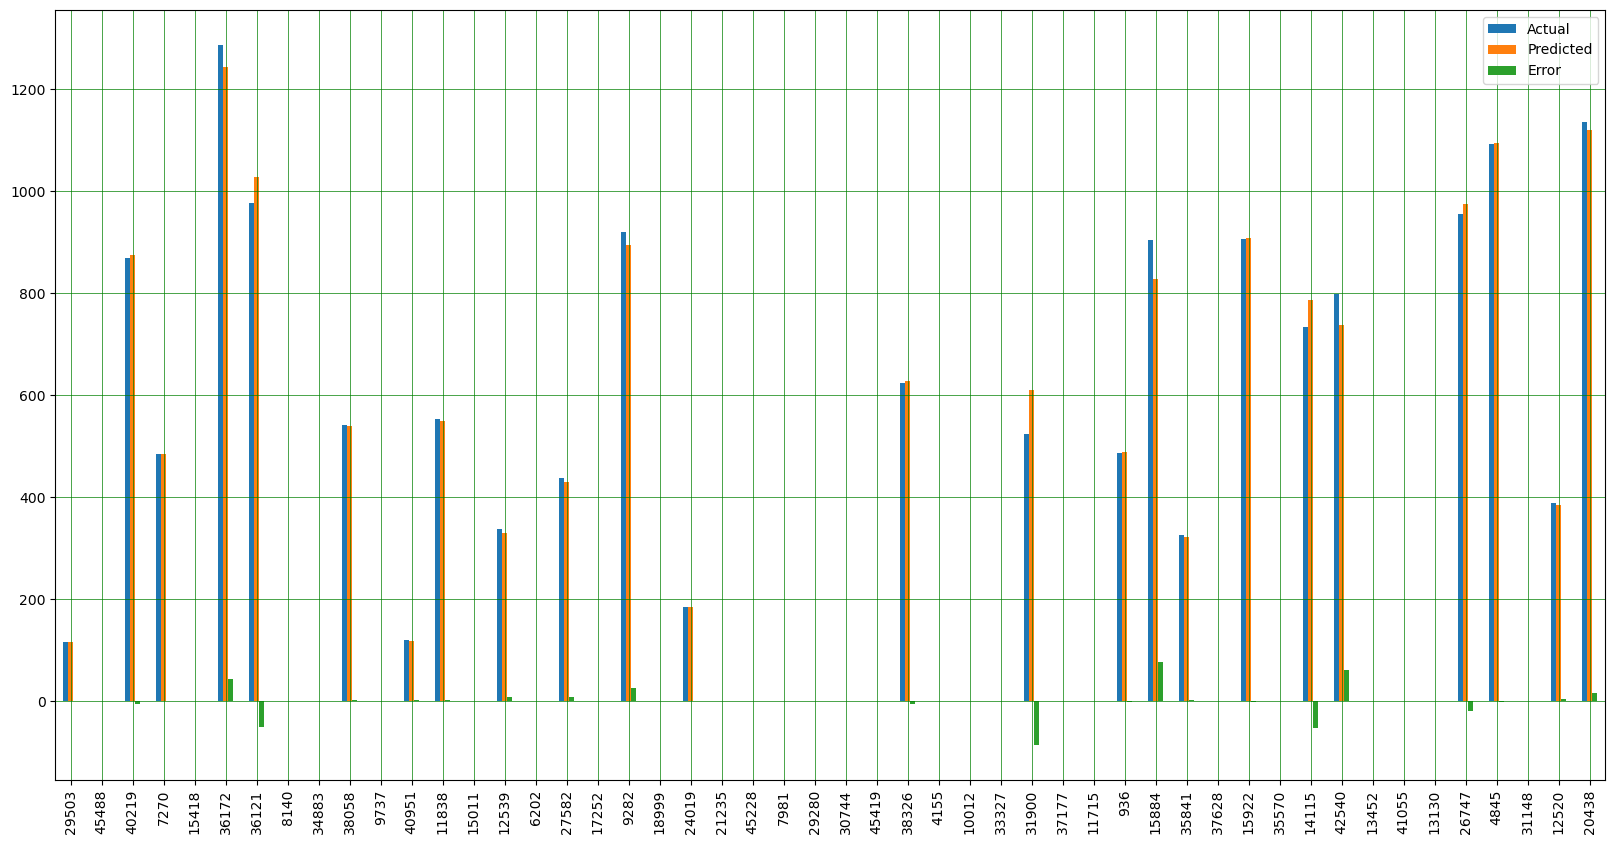

In [39]:
#plot of a bar chart using DataFrame cross_check and the first 50 rows of data

d = cross_check.head(50)
d.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5',color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5',color='black')
plt.show()

In [40]:
df_ml.head()

,Unnamed: 0,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15 00:00:00,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0
1,1,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15 00:00:00,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,1
2,2,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15 00:00:00,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,2
3,3,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15 00:00:00,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,3
4,4,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15 00:00:00,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,4


In [41]:
df_ml.tail()

,Unnamed: 0,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
45675,45675,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,2020-06-17 23:45:00,21.909288,20.427972,0.0,2020-06-17,23:45:00,17,6,25,23,45,1425,2020-06-17,17
45676,45676,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,2020-06-17 23:45:00,21.909288,20.427972,0.0,2020-06-17,23:45:00,17,6,25,23,45,1425,2020-06-17,18
45677,45677,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,2020-06-17 23:45:00,21.909288,20.427972,0.0,2020-06-17,23:45:00,17,6,25,23,45,1425,2020-06-17,19
45678,45678,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,2020-06-17 23:45:00,21.909288,20.427972,0.0,2020-06-17,23:45:00,17,6,25,23,45,1425,2020-06-17,20
45679,45679,zVJPv84UY57bAof,0.0,0.0,5910.000,7363272.0,2020-06-17 23:45:00,21.909288,20.427972,0.0,2020-06-17,23:45:00,17,6,25,23,45,1425,2020-06-17,21


In [54]:
# consider random values

X = data[['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = data['AC_POWER']

#test_data = np.array([5600,6259559,25.184316,0.0,0.0])


#print(X_test)

test_data = {'DAILY_YIELD': [9163], 'TOTAL_YIELD': [7846821.0], 'AMBIENT_TEMPERATURE': [35.25248613333334],'IRRADIATION': [1.2216518466666668]}
test_data1=pd.DataFrame(test_data)
#print(test_data1)
#test_data1.shape
newpred=rfr.predict(test_data1)
print(newpred)

[1345.32417867]
